# Calculate river tracer concentrations

Based on the classification system with glacial, continental and other rivers, find trace metal concentrations from river data from Manuel Colombo & Kristina Brown

Date: 2018-01-25

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
#import stations
import rivers
from mpl_toolkits.basemap import Basemap, cm
import cmocean

%matplotlib inline

/ocean/brogalla/GEOTRACES/analysis-birgit/cmocean-master/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
riv = rivers.rivers_list()
# Properties:
# names, lats, lons, dMn, pMn, dPb, pPb, dGa, pGa

Station locations:

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


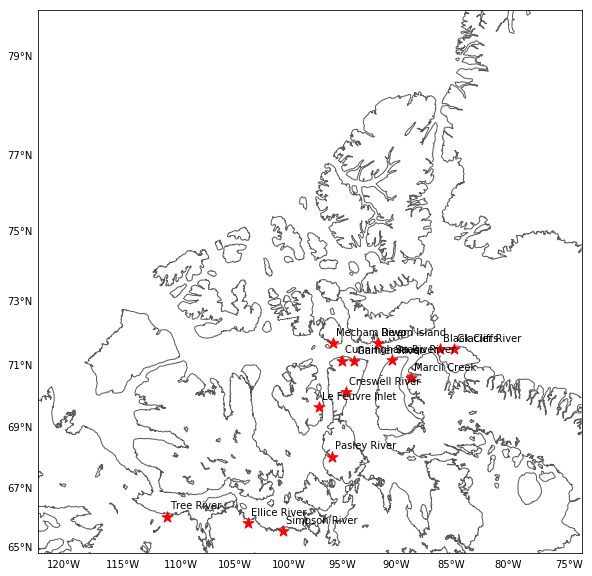

In [3]:
fig,ax = plt.subplots(figsize=(10,10))
proj=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -98, resolution='i', width=2.25e6, height=2.25e6)
proj.drawcoastlines(linestyle='-', color=[0.35, 0.35, 0.35], linewidth=1, zorder=1)
proj.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj.drawmeridians(np.arange(int(-140),int(-30),5),labels=[0,0,0,1], linewidth=0.0)

x, y = proj(riv.lons, riv.lats)
 
proj.scatter(x, y, marker='*',s=130,zorder=3, c='r')

for i, (X, Y) in enumerate(zip(x, y), start=1):
    ax.annotate(riv.names[i-1], (X,Y), xytext=(3, 8), textcoords='offset points')
    
fig.savefig('river_stations.png',bbox_inches='tight')

### Glacial rivers:

Rivers: Glacial River

In [9]:
dMn_glaciers = riv.dMn[1]
pMn_glaciers = riv.pMn[1]
dPb_glaciers = riv.dPb[1]
pPb_glaciers = riv.pPb[1]

### Continental drainage: 

Tree River, Ellice River, Simpson River

In [11]:
dMn_cont = riv.dMn[11:14]
pMn_cont = riv.pMn[11:14]
dPb_cont = riv.dPb[11:14]
pPb_cont = riv.pPb[11:14]

### Other:

Marcil, Saaqu, Devon Island, Cunningham, Garnier, Mecham, Creswell, Le Feuvre Inlet, Pasley

Black Cliffs?

In [12]:
dMn_other = riv.dMn[2:11]
pMn_other = riv.pMn[2:11]
dPb_other = riv.dPb[2:11]
pPb_other = riv.pPb[2:11]

In [15]:
dMn_other_ave = np.average(dMn_other)
dMn_glaciers_ave = np.average(dMn_glaciers)
dMn_cont_ave = np.average(dMn_cont)
pMn_other_ave = np.average(pMn_other)
pMn_glaciers_ave = np.average(pMn_glaciers)
pMn_cont_ave = np.average(pMn_cont)

In [16]:
dPb_other_ave = np.average(dPb_other)
dPb_glaciers_ave = np.average(dPb_glaciers)
dPb_cont_ave = np.average(dPb_cont)
pPb_other_ave = np.average(pPb_other)
pPb_glaciers_ave = np.average(pPb_glaciers)
pPb_cont_ave = np.average(pPb_cont)

Average dissolved concentrations:

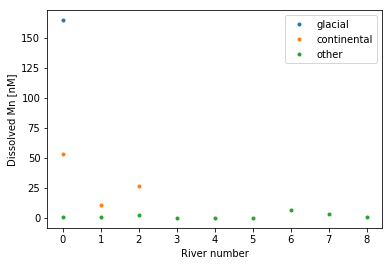

In [7]:
plt.plot(dMn_glaciers,'.',label='glacial')
plt.plot(dMn_cont,'.',label='continental')
plt.plot(dMn_other,'.',label='other')
plt.ylabel('Dissolved Mn [nM]')
plt.xlabel('River number')
plt.legend()
plt.savefig('dmn_rivers.png',bbox_inches='tight')

In [33]:
print('Mn, glaciers: '+str(dMn_glaciers_ave))
print('Mn, continental: '+str(dMn_cont_ave))
print('Mn, other: '+str(dMn_other_ave))

Mn, glaciers: 164.377574705
Mn, continental: 30.0384505789
Mn, other: 1.78347615178


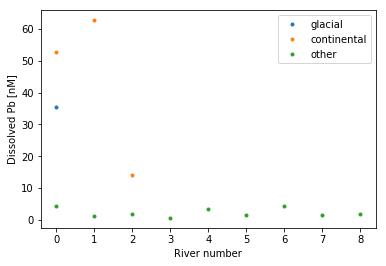

In [13]:
plt.plot(dPb_glaciers,'.',label='glacial')
plt.plot(dPb_cont,'.',label='continental')
plt.plot(dPb_other,'.',label='other')
plt.ylabel('Dissolved Pb [nM]')
plt.xlabel('River number')
plt.legend()
plt.savefig('dpb_rivers.png',bbox_inches='tight')

In [17]:
print('Pb, glaciers: '+str(dPb_glaciers_ave))
print('Pb, continental: '+str(dPb_cont_ave))
print('Pb, other: '+str(dPb_other_ave))

Pb, glaciers: 35.3834715587
Pb, continental: 43.1451371302
Pb, other: 2.29637433079


Average particulate concentrations:

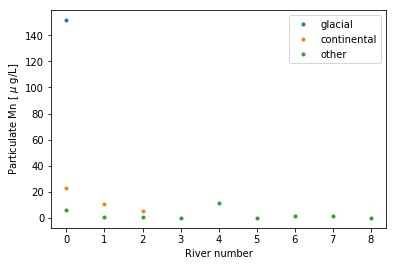

In [8]:
plt.plot(pMn_glaciers,'.',label='glacial')
plt.plot(pMn_cont,'.',label='continental')
plt.plot(pMn_other,'.',label='other')
plt.ylabel(r'Particulate Mn [ $\mu$ g/L]')
plt.xlabel('River number')
plt.legend()
plt.savefig('pmn_rivers.png',bbox_inches='tight')

In [32]:
print('Mn, glaciers: '+str(pMn_glaciers_ave))
print('Mn, continental: '+str(pMn_cont_ave))
print('Mn, other: '+str(pMn_other_ave))

Mn, glaciers: 151.486341801
Mn, continental: 13.1276308011
Mn, other: 2.43479627719


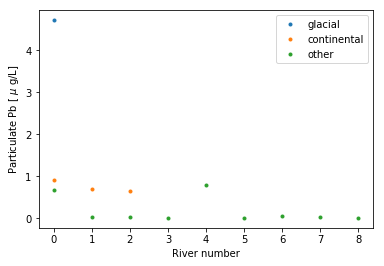

In [14]:
plt.plot(pPb_glaciers,'.',label='glacial')
plt.plot(pPb_cont,'.',label='continental')
plt.plot(pPb_other,'.',label='other')
plt.ylabel(r'Particulate Pb [ $\mu$ g/L]')
plt.xlabel('River number')
plt.legend()
plt.savefig('ppb_rivers.png',bbox_inches='tight')

In [18]:
print('Pb, glaciers: '+str(pPb_glaciers_ave))
print('Pb, continental: '+str(pPb_cont_ave))
print('Pb, other: '+str(pPb_other_ave))

Pb, glaciers: 4.7130905068
Pb, continental: 0.755200772533
Pb, other: 0.183726960289


These concentrations should be divided by the runoff of the particular river on the date on which they were measured. 